---
title: "Practice Activity 6.2 — Multiple Regression and Model Validation"
format:
  html:
    embed-resources: true   
    toc: true
    toc-depth: 2
execute:
  echo: true
  warning: false
  error: false
  freeze: auto              
  cache: true
---

[Practice Activity 6.2](https://github.com/shiqiwu212/GSB-S544-01/tree/f2b99f91b186adc74ecb4fb57a8a16b1937b47ab/Week%206/Practice%20Activities/Practice%20Activity%206.2)


# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [14]:
#Set Up and load the Palmer Penguins dataset
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins                      
from sklearn.linear_model import LinearRegression              
from sklearn.metrics import r2_score     

penguins = load_penguins()

In [15]:
# 10.4.1: Set target y and predictors X                              
y = penguins['bill_depth_mm']
X = penguins[['bill_length_mm','flipper_length_mm','body_mass_g','species','island','sex','year']]

# 11.5.1: Dummify categorical predictors before fitting             
X_enc = pd.get_dummies(X, drop_first=True)

# 11.4.3: Finish variable prep before any fit 
mask = y.notna() & X_enc.notna().all(axis=1)
y_clean = y.loc[mask]
X_enc = X_enc.loc[mask]

# 12.3: Fit multiple linear regression on the full data         
lr = LinearRegression()
lr_fit = lr.fit(X_enc, y_clean)

# 11.5 and 12.3: Predict on the same full data; compute SSR and R^2           
y_hat = lr_fit.predict(X_enc)
resid = y_clean - y_hat
SSR = float(np.sum(resid**2))          
R2  = float(r2_score(y_clean, y_hat))   

print(SSR)
print(R2)

208.12658322761854
0.8434943760341517


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

M1_numeric 1.5849303874950353 1.413619386488824
M2_num+species 0.8448846243928393 0.7590971462129069
M3_num+species+island 0.8420989951970913 0.7720345057055598
M4_full 0.7923642114441155 0.7524728097890959


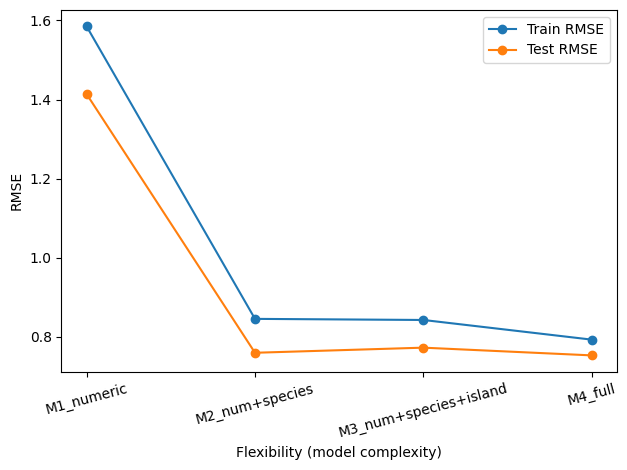

In [ ]:
# 10.4.3 and 12.4: One split used for all four models 
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_clean, test_size=0.25)

# 12.3: Use all predictors
cols_M1 = ['bill_length_mm','flipper_length_mm','body_mass_g','year']                 
cols_M2 = cols_M1 + ['species_Chinstrap','species_Gentoo']                            
cols_M3 = cols_M2 + ['island_Dream','island_Torgersen']                               
cols_M4 = X_enc.columns.tolist()                                                      

models = {'M1_numeric': cols_M1,'M2_num+species': cols_M2,'M3_num+species+island': cols_M3,'M4_full': cols_M4}

# 10.4.4 and 12.4: Fit LR on train; compute TRAIN/TEST RMSE for each
train_rmse, test_rmse, order = [], [], []
for name, cols in models.items():
    lr = LinearRegression()
    lr_fit = lr.fit(X_train[cols], y_train)
    y_tr_hat = lr_fit.predict(X_train[cols])
    y_te_hat = lr_fit.predict(X_test[cols])
    rmse_tr = float(np.sqrt(mean_squared_error(y_train, y_tr_hat)))
    rmse_te = float(np.sqrt(mean_squared_error(y_test,  y_te_hat)))
    train_rmse.append(rmse_tr); test_rmse.append(rmse_te); order.append(name)

# 12.4: Model Evaluation(With AI help to creating plot)
flex = np.arange(1, len(order) + 1)  
plt.figure()
plt.plot(flex, train_rmse, marker='o', label='Train RMSE')   
plt.plot(flex, test_rmse,  marker='o', label='Test RMSE')    
plt.xticks(flex, order, rotation=15)
plt.xlabel('Flexibility (model complexity)')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()

# Output of lowest TEST RMSE
for n, tr, te in zip(order, train_rmse, test_rmse):
    print(n, tr, te)

Answer:
The best model is "M4_full". Because it has the lowest test RMSE, about 0.8033712151325091. and also the train-test gap is small.